In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [2]:
# set the dimensions
N = 100
D = 2
M = 4
K = 3

In [3]:
# set the initial weights
# np.random.seed(1234)
W1 = np.random.randn(D,M)
b1 = np.random.randn(M)
W2 = np.random.randn(M,K)
b2 = np.random.randn(K)

In [4]:
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(2, 4)
(4,)
(4, 3)
(3,)


In [5]:
print(W1)
print()
print(b1)

[[ 1.57571169  1.02764672  0.44297541 -1.2894469 ]
 [-0.56979669 -0.55951506 -0.48991643  0.47956394]]

[ 0.15611355  0.06198689 -0.23423877 -0.55684249]


In [6]:
print(W2)
print()
print(b2)

[[ 0.27382919 -1.37128435 -0.0315938 ]
 [ 0.16588638  0.95201611  0.5027932 ]
 [-0.53458063  1.01280141  0.94856027]
 [ 0.73360324 -1.32687742  1.21989504]]

[ 0.55801348  0.06754309 -1.81194588]


In [7]:
# X, t = make_classification(n_samples=N, n_features=D, n_classes=K, n_redundant=0, 
#                            n_informative=D, n_clusters_per_class=1)
X, t = make_blobs(n_features=2, centers=3)

In [8]:
print(X.shape)
print(t.shape)

(100, 2)
(100,)


In [9]:
X1 = pd.DataFrame(X, columns=['f1', 'f2'])
t1 = pd.DataFrame(t, columns=['target'])
df = pd.concat([X1, t1], axis=1)

## Graph

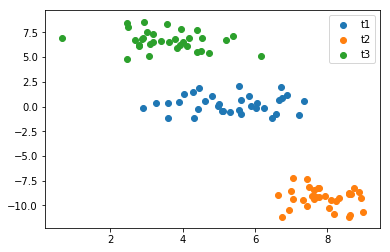

In [10]:
plt.scatter(df.loc[df['target']==0, 'f1'], df.loc[df['target']==0, 'f2'],
           label = 't1')
plt.scatter(df.loc[df['target']==1, 'f1'], df.loc[df['target']==1, 'f2'],
            label = 't2')
plt.scatter(df.loc[df['target']==2, 'f1'], df.loc[df['target']==2, 'f2'],
            label = 't3')
plt.legend()
plt.show()

## Log reg

In [11]:
def Z(X, W, b):
    return np.dot(X, W) + b

In [12]:
def sig(Z):
    return 1/(1+np.exp(-Z))

In [13]:
def soft(Z):
    exp_Z = np.exp(Z)
    return exp_Z/np.sum(exp_Z, axis=1, keepdims=True)

In [14]:
Z1 = Z(X, W1, b1)
Z1.shape

(100, 4)

In [15]:
y1 = sig(Z1)
y1.shape

(100, 4)

In [16]:
Z2 = Z(y1, W2, b2)
Z2.shape

(100, 3)

In [17]:
y2 = soft(Z2)
y2.shape

(100, 3)

In [18]:
def ohe(t):
    result = np.zeros((N,K))
    for i in range(len(t)):
        result[i, t[i]] = 1
    return result

In [19]:
def cost(t, y):
    return -t*np.log(y)

In [20]:
cost1 = cost(ohe(t), y2)
cost1.shape

(100, 3)

In [21]:
def error(cost):
    return (cost.sum())/N

In [22]:
err0 = error(cost1)
err0

1.342629762739968

In [23]:
def accuracy(t, y):
    return (t==np.round(y)).mean()

In [24]:
acc0 = accuracy(ohe(t), y2)
acc0

0.56

In [25]:
err_reg = [err0]
acc_reg = [acc0]
tt = 1

In [26]:
lr = 0.001

m_W1 = 0
m_b1 = 0
m_W2 = 0
m_b2 = 0

v_W1 = 0
v_b1 = 0
v_W2 = 0
v_b2 = 0

decay_m = 0.9
decay_v = 0.999
eps = 10e-8

print('initial error: {}'.format(err0))

initial error: 1.342629762739968


In [27]:
for e in range(15000):

    Z1 = Z(X, W1, b1)
    y1 = sig(Z1)
    Z2 = Z(y1, W2, b2)
    y2 = soft(Z2)
    cost1 = cost(ohe(t), y2)
    error1 = error(cost1)
    
    # gradients
    dZ2 = (ohe(t) - y2)
    dw2 = np.dot(y1.T, dZ2)
    db2 = (dZ2.sum(axis=0))
    dZ1 = np.dot(dZ2, W2.T)*(y1*(1-y1))
    dw1 = np.dot(X.T, dZ1)
    db1 = (dZ1.sum(axis=0))
    
    # First moment - m
    m_W2 = decay_m*m_W2 + (1-decay_m)*dw2
    m_b2 = decay_m*m_b2 + (1-decay_m)*db2
    m_W1 = decay_m*m_W1 + (1-decay_m)*dw1
    m_b1 = decay_m*m_b1 + (1-decay_m)*db1

    # Second moment - v
    v_W2 = decay_v*v_W2 + (1-decay_v)*dw2*dw2
    v_b2 = decay_v*v_b2 + (1-decay_v)*db2*db2
    v_W1 = decay_v*v_W1 + (1-decay_v)*dw1*dw1
    v_b1 = decay_v*v_b1 + (1-decay_v)*db1*db1

    # Bias correction for m
    m_hat_W2 = m_W2/(1-decay_m**tt)
    m_hat_b2 = m_b2/(1-decay_m**tt)
    m_hat_W1 = m_W1/(1-decay_m**tt)
    m_hat_b1 = m_b1/(1-decay_m**tt)

    # Bias correction for v
    v_hat_W1 = v_W1/(1-decay_v**tt)
    v_hat_b1 = v_b1/(1-decay_v**tt)
    v_hat_W2 = v_W2/(1-decay_v**tt)
    v_hat_b2 = v_b2/(1-decay_v**tt)
    
    # Update t
    tt += 1
    
    W2 += (lr*m_hat_W2)/(np.sqrt(v_hat_W2 + eps))
    b2 += (lr*m_hat_b2)/(np.sqrt(v_hat_b2 + eps))
    W1 += (lr*m_hat_W1)/(np.sqrt(v_hat_W1 + eps))
    b1 += (lr*m_hat_b1)/(np.sqrt(v_hat_b1 + eps))
    
    if e % 100 == 0:
        err_reg.append(error1)
        acc_reg.append(accuracy(ohe(t), y2))
        print('error:{}'.format(error1))

error:1.342629762739968
error:1.1448912239670286
error:0.9595394576207511
error:0.8542911880435706
error:0.7913290319227394
error:0.7475499252079026
error:0.7136161586435482
error:0.685509857251407
error:0.6609724278042941
error:0.6384560726545078
error:0.6165520700846785
error:0.5927272162047785
error:0.5580114031847716
error:0.49687901230683124
error:0.4364582914843538
error:0.3839688574045641
error:0.3380774573296469
error:0.3001596431402711
error:0.26940706737528886
error:0.24409194021041525
error:0.2227497893869198
error:0.20438107779006487
error:0.18832783932860353
error:0.1741413492456986
error:0.16149870944198638
error:0.15015632403002943
error:0.13992377208401538
error:0.13064826005380994
error:0.1222047072210197
error:0.11448897695795114
error:0.1074128549821684
error:0.1008996066662902
error:0.09487760907232952
error:0.08925834511309957
error:0.08373866755013822
error:0.07561514395971977
error:0.06494464065912461
error:0.05748614299709848
error:0.05179705979645359
error:0.04

In [28]:
accuracy(ohe(t), y2)

1.0

## Graph

### Constant learning rate

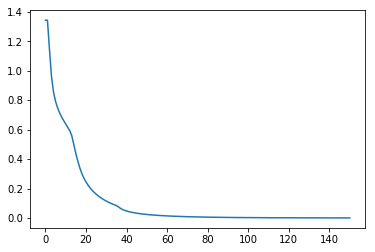

In [29]:
plt.plot(err_reg)
plt.show()

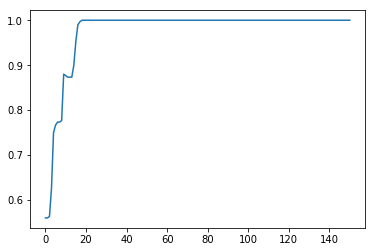

In [30]:
plt.plot(acc_reg)
plt.show()

# test

In [14]:
lr1 = [0.1]

In [15]:
for i in range(100):
    k = 0.1
    lr1.append(lr1[0]*np.exp(- k * i))

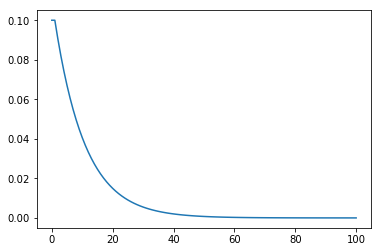

In [16]:
plt.plot(lr)
plt.show()

In [17]:
lr2 = [0.1]

In [18]:
for i in range(100):
    k = 0.1
    lr2.append(lr2[0]/((k * i) + 1))

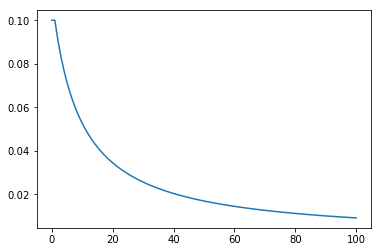

In [19]:
plt.plot(lr2)
plt.show()

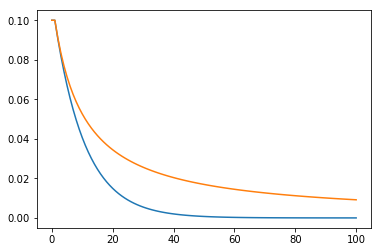

In [20]:
plt.plot(lr1)
plt.plot(lr2)
plt.show()